In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

class Particle (object):
    m = 1.0
    def __init__(self, y0=0, v0=50,  tf = 10.0, dt = 0.01):
        self.y = y0
        self.v = v0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        npoints = int(tf/dt)
        self.tlabel = 'time (s)'
        self.ylabel = 'y (m)'
        self.vlabel = 'v (m/s)'
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True)
        self.yv0 = np.array([self.y, self.v]) # NumPy array with initial position and velocity
    def scipy_trajectory(self):
        self.yv = odeint(self.derivative, self.yv0, self.tarray) 
        self.y = self.yv[:,0]
        self.v = self.yv[:,1]
    def derivative(self, yv, t):
        """right hand side of the differential equation"""
        y =yv[0]
        v =yv[1]
        a = self.F(y, v, t) / self.m
        return np.ravel(np.array([v, a]))  
    def F(self, y, v, t):
        g = -9.8
        # The force on a free particle is 0
        return np.array([self.m*g])
        print(y)     

In [2]:
myparticle = Particle()

myparticle.scipy_trajectory()

[[  0.          50.        ]
 [  0.50000952  49.9019019 ]
 [  0.99903708  49.8038038 ]
 ..., 
 [ 10.95899704 -47.8038038 ]
 [ 10.4799895  -47.9019019 ]
 [ 10.         -48.        ]]


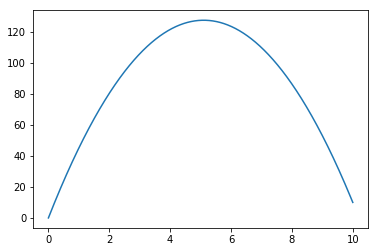

In [3]:
print(myparticle.yv)
plt.plot(myparticle.tarray, myparticle.y)